
0: 448x640 1 license_plate, 41.7ms
Speed: 1.8ms preprocess, 41.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


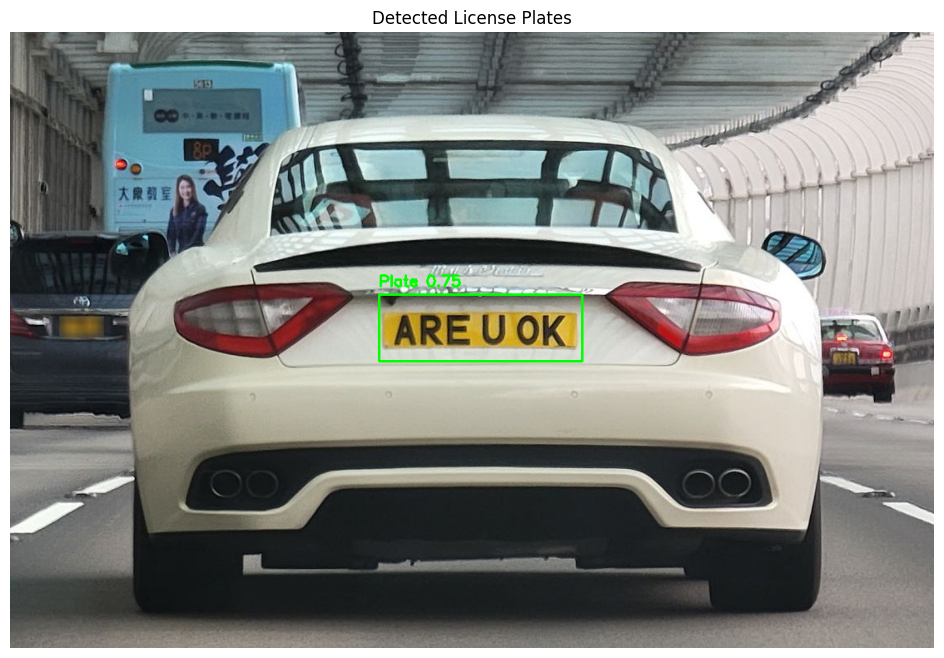

In [16]:
# plate_detection_debug.ipynb

# Step 1: Imports
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load your YOLOv8 license plate model
model = YOLO('../../_infrastructure/ai_models/license_plate_detector.pt')

# Step 3: Load test image
image_path = 'test_images/car.jpg'  # Put your test image here
image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 4: Run detection
results = model(image)[0]

# Step 5: Draw bounding boxes on the image
for box in results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf[0])
    label = f"Plate {conf:.2f}"
    
    cv2.rectangle(rgb_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(rgb_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Step 6: Display the result
plt.figure(figsize=(12, 8))
plt.imshow(rgb_image)
plt.title("Detected License Plates")
plt.axis('off')
plt.show()
